# Projeto Shark Attack

## Importacao dos dados
Projeto de limpeza de dados através do Phyton, cujo objetivo será utilizar estes dados para explicar a frequencia de ataques.

As instruções estão no link: <a href="https://ironhack.school/asset-v1:IRONHACK+DAFT+202007_SAO+type@asset+block@shark-attacks-project-v1.pdf">Projeto </a>

Os principais passos para limpeza da tabela estão nesta <a href = https://docs.google.com/spreadsheets/d/1T0Kb_vj8IPpNzGQYFnnTYMWt2q_rR7tv6d3h4lA3yYk/edit > google sheet </a>

In [1]:
'''
Algumas bibliotecas que foram instaladas e as que serao utilizadas
'''

#!pip install tqdm
#!pip install matplotlib
#!pip install moviepy
#!pip install bar_chart_race

import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt
import moviepy.editor as mpy
import bar_chart_race as bcr

In [2]:
import matplotlib.animation as manimation; manimation.writers.list()  

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']

In [3]:
#!pip install bar_chart_race
#!conda install -c conda-forge bar_chart_race
#!conda install -c conda-forge ffmpeg

### Importacao:

In [4]:
#ver nome dos arquivos:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5)


###DUVIDAS: Como capturo a pasta atual para colocar no listdir?

lista_arquivos = os.listdir('/')
print(lista_arquivos)


['$Recycle.Bin', 'bootmgr', 'BOOTNXT', 'ClientHealth', 'Config.Msi', 'Documents and Settings', 'DumpStack.log.tmp', 'EE55DA4937B7', 'FFmpeg', 'hiberfil.sys', 'Intel', 'IntelOptaneData', 'pagefile.sys', 'PerfLogs', 'Program Files', 'Program Files (x86)', 'ProgramData', 'Recovery', 'RemoveAppX.ps1.log', 'Software', 'swapfile.sys', 'System Volume Information', 'Users', 'Windows']


In [5]:
tb_shark = pd.read_csv('attacks.csv', encoding = 'latin-1')

tb_shark.select_dtypes(include = 'object').info()
print('\n')

tb_shark.describe()
print('\n')
tb_shark.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             8702 non-null   object
 1   Date                    6302 non-null   object
 2   Type                    6298 non-null   object
 3   Country                 6252 non-null   object
 4   Area                    5847 non-null   object
 5   Location                5762 non-null   object
 6   Activity                5758 non-null   object
 7   Name                    6092 non-null   object
 8   Sex                     5737 non-null   object
 9   Age                     3471 non-null   object
 10  Injury                  6274 non-null   object
 11  Fatal (Y/N)             5763 non-null   object
 12  Time                    2948 non-null   object
 13  Species                 3464 non-null   object
 14  Investigator or Source  6285 non-null   object
 15  pd

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,NaN,NaN
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN


In [6]:
#descompactar arquivo, verificar depois alguma ferramenta que abre o arquivo e procura o arquivo desejado.


###DUVIDAS: Porque nao consegui ler o arquivos com o UTF-8?
'''
file = open('attacks.csv', 'rb')

lista_vazia=[]

for i in range(5):
    lista_vazia.append(file[i])

file.close()

print(lista_vazia)

for i in range(5):
    print(file_lines[i].encoding('utf-8'))

file.close()
'''

"\nfile = open('attacks.csv', 'rb')\n\nlista_vazia=[]\n\nfor i in range(5):\n    lista_vazia.append(file[i])\n\nfile.close()\n\nprint(lista_vazia)\n\nfor i in range(5):\n    print(file_lines[i].encoding('utf-8'))\n\nfile.close()\n"

### CSV
Os dados deverão ser obtidos através do link:
<a href="https://www.kaggle.com/teajay/global-shark-attacks/download">Global Shark Attacks</a>

Outras informações são possiveis obter do site <a href="https://www.sharkattackfile.net/index.htm">Global Shark Attack File</a>


In [7]:
#tratamento do nome das colunas:

nomes_col_originais=tb_shark.columns
print(nomes_col_originais)
print(len(set(nomes_col_originais)))

pattern = r'[ :/|\.()]+'
nomes_col_novas = [re.sub(pattern, '_', i.lower()) for i in tb_shark]

print('\n')
print(set(nomes_col_novas))
print(len(set(nomes_col_novas)))

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
24


{'injury', 'date', 'href_formula', 'age', 'species_', 'original_order', 'country', 'time', 'unnamed_23', 'activity', 'unnamed_22', 'type', 'location', 'name', 'case_number_1', 'pdf', 'sex_', 'investigator_or_source', 'case_number', 'year', 'case_number_2', 'fatal_y_n_', 'href', 'area'}
24


In [8]:
print(tb_shark.columns)

print('\n')
print(nomes_col_novas)
tb_shark.columns = nomes_col_novas

print('\n')
print(tb_shark.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


['case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'unnamed_22', 'unnamed_23']


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time',
       'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')


### Formulas para definir visualizacao da tabela final

Algumas formulas para facilitar visualizacao dos dados e fazer checks

In [9]:
#Sou visual, preciso colocar saidas para ver o que estou fazendo:
### Duvida
def rever_tabela():
    
    nomes_col_novas = list(tb_shark.columns)
    print('\n----------------------------------\n')

    print(f'Nome das colunas: {nomes_col_novas} {tb_shark.dtypes.value_counts()}')
    
    for i in nomes_col_novas:
        print (f'{i}')
        print(tb_shark[i].describe())
        print('\n----------------------------------\n')

        
def isnumber(value):
    try:
         float(value)
    except ValueError:
         return False
    return True

In [10]:
rever_tabela()


----------------------------------

Nome das colunas: ['case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'unnamed_22', 'unnamed_23'] object     22
float64     2
dtype: int64
case_number
count     8702
unique    6287
top          0
freq      2400
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      2018.000000
Name: year, Length: 8, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
co

## Limpeza dos dados

### Retira de colunas com dados desnecesarios

Algumas colunas foram analisadas e possuiam dados redudantes:

In [11]:
#As colunas unnamed_22 está com apenas um valor "pare aqui" ("stopped here"), e será "dropada":

tb_shark = tb_shark.drop(columns = 'unnamed_22') ###DUVIDA, como fazer por "DEF" e poder usar mais vezes

rever_tabela()


----------------------------------

Nome das colunas: ['case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'unnamed_23'] object     21
float64     2
dtype: int64
case_number
count     8702
unique    6287
top          0
freq      2400
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      2018.000000
Name: year, Length: 8, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
count     6252
u

In [12]:
#O mesmo faremos com a coluna unnamed_23 está com apenas dois valores será analisada, e, se necessário, será "dropada":


print(tb_shark['unnamed_23'].unique())
print('\n----------------------------------\n')
print(tb_shark.groupby('unnamed_23').first())


[nan 'Teramo' 'change filename']

----------------------------------

                  case_number                  date    year        type  \
unnamed_23                                                                
Teramo             1952.03.30           30-Mar-1952  1952.0  Unprovoked   
change filename  1878.09.14.R  Reported 14-Sep-1878  1878.0    Provoked   

                              country         area  \
unnamed_23                                           
Teramo           NETHERLANDS ANTILLES      Curacao   
change filename                   USA  Connecticut   

                                   location  \
unnamed_23                                    
Teramo                                 None   
change filename  Branford, New Haven County   

                                                        activity  \
unnamed_23                                                         
Teramo           Went to aid of child being menaced by the shark   
change filename    

In [13]:
'''
Alem dos nulos, os dois retornos são lixos ('Teramo' e'change filename')
Uutilizaremos a função de dropar colunas para continuar a analise da tabela
'''

tb_shark = tb_shark.drop(columns = 'unnamed_23')
rever_tabela()


----------------------------------

Nome das colunas: ['case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order'] object     20
float64     2
dtype: int64
case_number
count     8702
unique    6287
top          0
freq      2400
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      2018.000000
Name: year, Length: 8, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
count     6252
unique     212


## Limpeza das linhas

### Linhas 100% nulas

Depois da limpeza de colunas, analisaremos as linhas que estao 100% nulas e na sequencia as linhas que possuem algum dado e se estao na coluna correta:

In [14]:
'''
Depois de limpar colunas que estão sem dados, vamos as linhas sem dados
Eixo 0: colunas
Eixo 1: linhas
'''
#No final, quantas colunas temos?
colunas_atuais = len(tb_shark.columns)
print(colunas_atuais)

22


In [15]:
#Quais sao as linhas 100% vazias?

tb_shark['LinhasVazias'] = tb_shark.isna().sum(axis = 1) / colunas_atuais ==1
print(tb_shark['LinhasVazias'])

0        False
1        False
         ...  
25721     True
25722    False
Name: LinhasVazias, Length: 25723, dtype: bool


### Tabelas stages

Apos a identificacao das linhas em branco, utilizaremos as tabelas stages para garantir que nao estamos eliminando dados de forma equivocada

In [16]:
stage_1 = tb_shark.copy()
stage_2 = tb_shark.drop(tb_shark.loc[tb_shark['LinhasVazias']== True].index).reset_index()

In [17]:
'''
###DUVIDAS
Até aqui não há duvidas bizarras,
mas algumas coisa estou fazendo errado que não permite que eu utilize os metodos mais de uma vez
exemplo dropar colunas da tabela e ver resultado final depois
'''
tb_shark['LinhasVazias']== True

0        False
1        False
         ...  
25721     True
25722    False
Name: LinhasVazias, Length: 25723, dtype: bool

In [18]:
# Original:

print(tb_shark.select_dtypes(include = 'object').info())
print('\n')

print(tb_shark.describe())
print('\n')

print(tb_shark.head(7))
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case_number             8702 non-null   object
 1   date                    6302 non-null   object
 2   type                    6298 non-null   object
 3   country                 6252 non-null   object
 4   area                    5847 non-null   object
 5   location                5762 non-null   object
 6   activity                5758 non-null   object
 7   name                    6092 non-null   object
 8   sex_                    5737 non-null   object
 9   age                     3471 non-null   object
 10  injury                  6274 non-null   object
 11  fatal_y_n_              5763 non-null   object
 12  time                    2948 non-null   object
 13  species_                3464 non-null   object
 14  investigator_or_source  6285 non-null   object
 15  pd

In [19]:
# Copia original:

print(stage_1.select_dtypes(include = 'object').info())
print('\n')

print(stage_1.describe())
print('\n')

print(stage_1.head(7))
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case_number             8702 non-null   object
 1   date                    6302 non-null   object
 2   type                    6298 non-null   object
 3   country                 6252 non-null   object
 4   area                    5847 non-null   object
 5   location                5762 non-null   object
 6   activity                5758 non-null   object
 7   name                    6092 non-null   object
 8   sex_                    5737 non-null   object
 9   age                     3471 non-null   object
 10  injury                  6274 non-null   object
 11  fatal_y_n_              5763 non-null   object
 12  time                    2948 non-null   object
 13  species_                3464 non-null   object
 14  investigator_or_source  6285 non-null   object
 15  pd

In [20]:
# Limpezas:

print(stage_2.select_dtypes(include = 'object').info())
print('\n')

print(stage_2.describe())
print('\n')

print(stage_2.head(7))
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case_number             8702 non-null   object
 1   date                    6302 non-null   object
 2   type                    6298 non-null   object
 3   country                 6252 non-null   object
 4   area                    5847 non-null   object
 5   location                5762 non-null   object
 6   activity                5758 non-null   object
 7   name                    6092 non-null   object
 8   sex_                    5737 non-null   object
 9   age                     3471 non-null   object
 10  injury                  6274 non-null   object
 11  fatal_y_n_              5763 non-null   object
 12  time                    2948 non-null   object
 13  species_                3464 non-null   object
 14  investigator_or_source  6285 non-null   object
 15  pdf 

In [21]:
#Limpeza da stage_2 não impactou a tabela de forma significativa nas colunas que possuem dados:
print(stage_2.info())

print('\n\n\n')
print(stage_2.columns)

print('\n\n\n')
### DUVIDA: este está dando errado
print(stage_2.iloc[: , 1:21])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   8703 non-null   int64  
 1   case_number             8702 non-null   object 
 2   date                    6302 non-null   object 
 3   year                    6300 non-null   float64
 4   type                    6298 non-null   object 
 5   country                 6252 non-null   object 
 6   area                    5847 non-null   object 
 7   location                5762 non-null   object 
 8   activity                5758 non-null   object 
 9   name                    6092 non-null   object 
 10  sex_                    5737 non-null   object 
 11  age                     3471 non-null   object 
 12  injury                  6274 non-null   object 
 13  fatal_y_n_              5763 non-null   object 
 14  time                    2948 non-null   

In [22]:
###DUVIDA: este está dando errado
#Como está dando errado fazer a copia stage_2 para tb_shark, vou mudar o codigo um pouco nesta parte
tb_shark = stage_2.copy()
#Depois deleto esta parte abaixo:
#tb_shark = tb_shark.drop(tb_shark.loc[tb_shark['LinhasVazias']== True].index).reset_index()

In [23]:
###DUVIDA: eu sei que tem uma variavel global dentro, como deveria ser feita para funcionar?
#rever_tabela()
stage_2.columns

Index(['index', 'case_number', 'date', 'year', 'type', 'country', 'area',
       'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_',
       'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula',
       'href', 'case_number_1', 'case_number_2', 'original_order',
       'LinhasVazias'],
      dtype='object')

In [24]:
rever_tabela()


----------------------------------

Nome das colunas: ['index', 'case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'LinhasVazias'] object     20
float64     2
int64       1
bool        1
dtype: int64
index
count     8703.000000
mean      4352.955647
             ...     
75%       6526.500000
max      25722.000000
Name: index, Length: 8, dtype: float64

----------------------------------

case_number
count     8702
unique    6287
top          0
freq      2400
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      2018.000000
Name: year, Length: 

## Primeira versao da tabela de trabalho

### 80/20, foco na segunda parte da mineracao

Depois de eliminar a informaacao que nao traz nenhum dado adicional para analise trabalharemos para unificar informacao, correcoes de dados:

In [25]:
# Qtos são os valores unicos por colunas, ou seja, é possivel que haja colunas com a mesma informação?
def ValoresUnicos ():
    dimensao = tb_shark.shape
    print(f'Tabela tem linhas e colunas: {dimensao}. \n \n ---------------------------- \n')
    ### DUVIDA Como fazer para separar linhas e colunas 
    for column in tb_shark.columns:
        print(f'{column}: {len(tb_shark[column].unique())}')
        

ValoresUnicos()

Tabela tem linhas e colunas: (8703, 24). 
 
 ---------------------------- 

index: 8703
case_number: 6288
date: 5434
year: 250
type: 9
country: 213
area: 826
location: 4109
activity: 1533
name: 5231
sex_: 7
age: 158
injury: 3738
fatal_y_n_: 9
time: 367
species_: 1550
investigator_or_source: 4970
pdf: 6292
href_formula: 6291
href: 6286
case_number_1: 6286
case_number_2: 6287
original_order: 6309
LinhasVazias: 1


In [26]:
#Ha linhas duplicadas?
sum(tb_shark.duplicated())

0

In [27]:
'''
Grande possibilidade de eliminar 4 colunas:
case_number_1: 6286
case_number_2: 6287
original_order: 6309
LinhasVazias: 1
'''

'\nGrande possibilidade de eliminar 4 colunas:\ncase_number_1: 6286\ncase_number_2: 6287\noriginal_order: 6309\nLinhasVazias: 1\n'

In [28]:
#teste:
try:
    print(f' case_number: {len(tb_shark["case_number"].unique())}')
except:
    pass

 case_number: 6288


In [29]:
#como faço a pipe na porcaria do teclado do mac? troquei de teclado para programar, kkkk

teste_pipe = ((tb_shark['case_number_1'] == tb_shark['case_number']) |
              (tb_shark['case_number_2'] == tb_shark['case_number']))

print(teste_pipe)

0        True
1        True
        ...  
8701    False
8702    False
Length: 8703, dtype: bool


In [30]:
# Juntando condicionais:
((tb_shark['case_number_1'] == tb_shark['case_number']) |
                 (tb_shark['case_number_2'] == tb_shark['case_number']))

0        True
1        True
        ...  
8701    False
8702    False
Length: 8703, dtype: bool

In [31]:
iguais = sum(((tb_shark['case_number_1'] == tb_shark['case_number']) |
                 (tb_shark['case_number_2'] == tb_shark['case_number'])))
print(f'case_number são: {len(tb_shark["case_number"].unique())} \n')
print(f'case_number_1 são: {len(tb_shark["case_number_1"].unique())} \n')
print(f'case_number_2 são: {len(tb_shark["case_number_2"].unique())} \n')
print(f'Coincidem as duas colunas: {iguais}')

###DUVIDA, porque a soma resultou mais que o numero de linhas

case_number são: 6288 

case_number_1 são: 6286 

case_number_2 são: 6287 

Coincidem as duas colunas: 6298


In [32]:
#Dado o resultado anterior, podemos eliminar algumas colunas do data frame?
tb_shark['iguais'] = ((tb_shark['case_number_1'] == tb_shark['case_number']) |
                 (tb_shark['case_number_2'] == tb_shark['case_number']))
print(tb_shark[tb_shark['iguais'] != True])

      index   case_number                  date    year        type country  \
390     390    2015.07-10           10-Jul-2015  2015.0  Unprovoked     USA   
4949   4949  1934.01.08.R  Reported 08-Feb-1934  1934.0     Boating  TURKEY   
...     ...           ...                   ...     ...         ...     ...   
8701   8701             0                   NaN     NaN         NaN     NaN   
8702  25722            xx                   NaN     NaN         NaN     NaN   

            area                         location activity          name sex_  \
390   California  Huntington Beach, Orange County  Surfing  Danny Miskin    M   
4949    Istanbul       Haydarpasa jetty, Istanbul  Fishing       2 males    M   
...          ...                              ...      ...           ...  ...   
8701         NaN                              NaN      NaN           NaN  NaN   
8702         NaN                              NaN      NaN           NaN  NaN   

      age                             

In [33]:
# A linha 5488 mostra que há dados em colunas case_number_1 ou case_number2, mas a case_number está em branco
# De igual maneira, as linhas 8700,8701 e outras tem case_number "0" o "xx", aparentemente sujeira da base

# Primeiro vamos tratar as linhas com sae_number null, mas tem dados em outra coluna

tb_shark['novo_case_number'] = np.where(((tb_shark['case_number'] == np.nan) &
                                          (tb_shark['case_number_1'] != np.nan)),
                                         tb_shark['case_number_1'],
                               np.where(((tb_shark['case_number'] == np.nan) &
                                         (tb_shark['case_number_2'] != np.nan)),
                                        tb_shark['case_number_2'],
                                        tb_shark['case_number']))


rever_tabela()


----------------------------------

Nome das colunas: ['index', 'case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'LinhasVazias', 'iguais', 'novo_case_number'] object     21
float64     2
bool        2
int64       1
dtype: int64
index
count     8703.000000
mean      4352.955647
             ...     
75%       6526.500000
max      25722.000000
Name: index, Length: 8, dtype: float64

----------------------------------

case_number
count     8702
unique    6287
top          0
freq      2400
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      20

In [34]:
# Agora vamos analisar as linhas que possuem "0" ou "xx" em case_number

coluna_com_xx = (tb_shark['case_number'] == 'xx') | (tb_shark['case_number'] == '0') 

print(sum(coluna_com_xx))

tb_coluna_xx = tb_shark[coluna_com_xx]

for column in tb_coluna_xx.columns:
    print(f'{column}: {len(tb_coluna_xx[column].unique())}')

2401
index: 2401
case_number: 2
date: 1
year: 1
type: 1
country: 1
area: 1
location: 1
activity: 1
name: 1
sex_: 1
age: 1
injury: 1
fatal_y_n_: 1
time: 1
species_: 1
investigator_or_source: 1
pdf: 1
href_formula: 1
href: 1
case_number_1: 1
case_number_2: 1
original_order: 8
LinhasVazias: 1
iguais: 1
novo_case_number: 2


In [35]:
# Com excecao da coluna original_order com 8 casos, todas as outras tem a mesma informacao
tb_coluna_xx['original_order'].unique()

array([6304., 6305., 6306., 6307., 6308., 6309., 6310.,   nan])

In [36]:
# Os valores nao parecem representar codigos, assim, entrar para limpeza
try:
    colunas_atuais = len(tb_shark.columns)
    tb_shark['LinhasVazias'] = np.where(((tb_shark.isna().sum(axis = 1) / colunas_atuais ==1) |
                                        (coluna_com_xx)),
                                        True,False)
    #print(tb_shark['LinhasVazias'])

    tb_shark = tb_shark.drop(tb_shark.loc[tb_shark['LinhasVazias']== True].index).reset_index()
except:
    pass

In [37]:
rever_tabela()


----------------------------------

Nome das colunas: ['level_0', 'index', 'case_number', 'date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number_1', 'case_number_2', 'original_order', 'LinhasVazias', 'iguais', 'novo_case_number'] object     21
float64     2
int64       2
bool        2
dtype: int64
level_0
count    6302.00
mean     3150.50
          ...   
75%      4725.75
max      6301.00
Name: level_0, Length: 8, dtype: float64

----------------------------------

index
count    6302.00
mean     3150.50
          ...   
75%      4725.75
max      6301.00
Name: index, Length: 8, dtype: float64

----------------------------------

case_number
count           6301
unique          6285
top       2014.08.02
freq               2
Name: case_number, dtype: object

----------------------------------

date
count     6302
unique    5433
top       19

In [38]:
#Limpar um pouco a tabela que vamos trabalhar:

colunas_del = ['pdf', 'href_formula', 'href','original_order','level_0', 'index', 'case_number','LinhasVazias', 'iguais','case_number_1', 'case_number_2']

for i in colunas_del:
    try:
        tb_shark = tb_shark.drop(columns = [i])
    except:
        pass


In [39]:
rever_tabela()


----------------------------------

Nome das colunas: ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'novo_case_number'] object     15
float64     1
dtype: int64
date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
            ...     
75%      2005.000000
max      2018.000000
Name: year, Length: 8, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
count     6252
unique     212
top        USA
freq      2229
Name: country, dtype: object

----------------------------------

area
count        5847
unique        825
top       Florida
freq         1037
Name: area, dtype: object

--------------------

## Dados da Tabela

### primeira visao dos dados:

Leitura da traz dados  traz coisas interessantes, como ataques de tubarao antes de cristo

Estes dados serao clusterizados para definirmos uma estrategia para apresenta-los

In [40]:
#temporiamente vamos aumentar numero de linhas para visualizar:
pd.set_option('display.max_rows', 200)

In [41]:
tb_shark.sort_values(by=['novo_case_number'])

,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_y_n_,time,species_,investigator_or_source,novo_case_number
6177,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",0000.0214
6178,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,0000.0336
6179,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN,Herodotus (485 - 425 B.C.),0000.0493
6180,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",0000.0725
6176,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,0005.00.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,2003?,0.0,Unprovoked,BAHAMAS,Andros Islands,Great Guana Cay,Spearfishing,C.D. Dollar,M,NaN,Swim fin bitten,N,NaN,1.8 m [6'] shark,"R.D. Weeks, GSAF",ND.0100
6215,"No date, Before 1963",0.0,Unprovoked,BAHREIN,NaN,NaN,Pearl diving,male,M,NaN,FATAL,Y,NaN,Tiger shark,A.C. Doyle,ND.0102
6214,1950s,0.0,Unprovoked,AUSTRALIA,Torres Strait,NaN,Helmet diving,male,M,NaN,"No injury, helmet bitten",N,NaN,Tiger shark,"A. Seekee & R. Callinan, Courier-Mail, 7/7/199...",ND.0104
6209,"No date, late 1960s",0.0,Unprovoked,VENEZUELA,Los Roques Islands,NaN,Spearfishing,4 French divers,M,NaN,"FATAL (x3), one survived with minor injuries",Y,NaN,said to involve 2.5 m hammerhead sharks,http://waterco.com.br/ataque_tubarao.htm,ND.0110


In [42]:
print(f' case_number: {len(tb_shark["date"].unique())} \n\n\n')
print(f' case_number: {tb_shark["date"].unique()}')
#5433


 case_number: 5433 



 case_number: ['25-Jun-2018' '18-Jun-2018' '09-Jun-2018' ... '1900-1905' '1883-1889'
 '1845-1853']


### Formulas de tratamento de dados

#### Datas e numeros:

Algumas formulas e metodos so sao possiveis com determinados tipos de dados, assim sera necessario trata-los

In [43]:
'''
Tratamento de datas

Codigo de https://github.com/Marcio-Marchiori/shark_attack/blob/main/shark_.py
'''

def use_dates(column_dates):
    '''This function will receive a date in the dd-mm-yyyy format, get rid
    of anything that isn't an actual date, change the date format to 
    yyyy-mm-dd all numerical and return it as the date changed or as a string
    'Not useful.' if the function deans it as such.'''

    from datetime import datetime
    regex_date = '\d+[- ]\w{3,}[- ]\d{4}'
    try:
        try:
            date_to_use = re.findall(regex_date,column_dates)[0]
        except IndexError:
            return 'Vazio'
        if re.match(regex_date, column_dates):
            try:
                return datetime.strptime(date_to_use, "%d-%b-%Y").date()
            except ValueError:
                return datetime.strptime(date_to_use, "%d-%B-%Y").date()
        else:
            return 'Vazio'
    except ValueError:
        return 'Vazio'

def better_dates(date_all):
    from dateutil import parser
    from datetime import datetime
    try:
        date_use = parser.parse(date_all)
        string_date = str(date_use.year) + '-' + str(date_use.month) + '-' + str(date_use.day)
        
        return datetime.strptime(string_date, "%Y-%m-%d").date()
    except:
        return 'Vazio'
    
def qual_ano(coluna):
    try:
        coluna.dt.year
    except:
        np.nan

def split_it(year):
    return re.findall('(\d\d\d\d)', year)

def adjust_this_text(text):
    try:
        pattern = r'[ :/|\.()?]+'
        return re.sub(pattern, '', text.lower())
    except AttributeError:
        return 'Vazio'
    except ValueError:
        return 'Vazio' 


In [44]:
tb_shark['novo_date'] = tb_shark['date'].apply(use_dates)

print(f' case_number: {len(tb_shark["novo_date"].unique())} \n\n\n')
print(f' case_number: {tb_shark["novo_date"].unique()}')

 case_number: 4189 



 case_number: [datetime.date(2018, 6, 25) datetime.date(2018, 6, 18)
 datetime.date(2018, 6, 9) ... datetime.date(1751, 7, 27)
 datetime.date(1742, 12, 17) datetime.date(1703, 3, 26)]


In [45]:
rever_tabela()


----------------------------------

Nome das colunas: ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'novo_case_number', 'novo_date'] object     16
float64     1
dtype: int64
date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
std       281.116308
min         0.000000
25%      1942.000000
50%      1977.000000
75%      2005.000000
max      2018.000000
Name: year, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
count     6252
unique     212
top        USA
freq      2229
Name: country, dtype: object

----------------------------------

area
count        5847
unique        825
top       Florida


In [46]:
print(tb_shark.year.map(type).value_counts())

print('\n\n\n')
print(tb_shark.year.value_counts())

print('\n\n\n')
print(tb_shark['novo_date'].value_counts())

<class 'float'>    6302
Name: year, dtype: int64




2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1767.0      1
1816.0      1
1812.0      1
1822.0      1
1748.0      1
Name: year, Length: 249, dtype: int64




Vazio         1518
2003-10-05       5
1995-07-28       5
2001-04-12       5
2010-01-09       4
              ... 
1877-12-12       1
2000-06-10       1
1956-07-28       1
1959-08-11       1
2007-01-09       1
Name: novo_date, Length: 4189, dtype: int64


In [47]:
mask_novo_date_na = tb_shark['novo_date']== 'Vazio'
#tb_shark['LinhasVazias'] = tb_shark.isna().sum(axis = 1) / colunas_atuais ==1
print(mask_novo_date_na)

0       False
1       False
2       False
3       False
4       False
        ...  
6297     True
6298     True
6299     True
6300     True
6301     True
Name: novo_date, Length: 6302, dtype: bool


In [48]:
#print(tb_shark[mask_novo_date_na])
#print(tb_shark[tb_shark['novo_date']== 'NA'])

print(tb_shark[((tb_shark['novo_date']== 'Vazio') & (tb_shark['year']== 0))])

print(((tb_shark['novo_date']== 'Vazio') & (tb_shark['year']== 0)).sum())

#Isto significa que temos dados na tabela ano, mas a data esta ruim 

                                                   date  year          type  \
6177                                       Ca. 214 B.C.   0.0    Unprovoked   
6178                                      Ca. 336.B.C..   0.0    Unprovoked   
6179                                           493 B.C.   0.0  Sea Disaster   
6180                                       Ca. 725 B.C.   0.0  Sea Disaster   
6181                                        Before 1939   0.0    Unprovoked   
6182                                       1990 or 1991   0.0    Unprovoked   
6183                                        Before 2016   0.0    Unprovoked   
6184                                    Before Oct-2009   0.0    Unprovoked   
6185                                        Before 1934   0.0    Unprovoked   
6186                                        Before 1934   0.0    Unprovoked   
6187                                              2009?   0.0    Unprovoked   
6188                                        Before 1

125


In [49]:
#print(tb_shark[((tb_shark['novo_date']== 'NA') & (tb_shark['year']!= 0))])
print(((tb_shark['novo_date']== 'Vazio') & (tb_shark['year']!= 0)).sum())
print(tb_shark[((tb_shark['novo_date']== 'Vazio') & (tb_shark['year']!= 0))])

#Criar coluna com ano tratada:
sem_poss_de_ano = ((tb_shark['novo_date']== 'Vazio') & (tb_shark['year']== 0))

1393
                      date    year          type    country  \
14                May 2018  2018.0      Provoked  AUSTRALIA   
17    Reported 30-Apr-2018  2018.0    Unprovoked   THAILAND   
31    Reported 10-Apr-2018  2018.0       Invalid     BRAZIL   
59    Reported 25-Nov-2017  2017.0  Sea Disaster      LIBYA   
62    Reported 13-Nov-2017  2017.0    Unprovoked        NaN   
...                    ...     ...           ...        ...   
6172              Ca. 1554  1554.0    Unprovoked     FRANCE   
6173              Ca. 1543  1543.0    Unprovoked  VENEZUELA   
6174        Circa 500 A.D.   500.0    Unprovoked     MEXICO   
6175              77  A.D.    77.0    Unprovoked        NaN   
6176            Ca. 5 A.D.     5.0    Unprovoked  AUSTRALIA   

                             area                   location  \
14              Westerm Australia                 Dugong Bay   
17                        Hua Hin              Sai Noi Beach   
31                        Alagoas  Praia de Sa

In [50]:
#teste_vazio = (tb_shark['novo_date'] != 'Vazio') & ()
# is_na() para np.nan
#https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html

In [51]:
tb_shark['ano_tratado'] = np.where((tb_shark['year'] != 0) & (tb_shark['year'].apply(isnumber) == True),
                          tb_shark['year'],
                          np.where((tb_shark['novo_date'] != 'Vazio'),
                                   qual_ano(tb_shark['novo_date']),
                                  ''))

#np.where((tb_shark['novo_date'] != 'NA'),pd.to_datetime(tb_shark['novo_date']).dt.year
#pandas.Series.dt.year()

In [52]:
tb_shark['ano_tratado'].describe

<bound method NDFrame.describe of 0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6297          
6298          
6299          
6300          
6301          
Name: ano_tratado, Length: 6302, dtype: object>

In [53]:
rever_tabela()


----------------------------------

Nome das colunas: ['date', 'year', 'type', 'country', 'area', 'location', 'activity', 'name', 'sex_', 'age', 'injury', 'fatal_y_n_', 'time', 'species_', 'investigator_or_source', 'novo_case_number', 'novo_date', 'ano_tratado'] object     17
float64     1
dtype: int64
date
count     6302
unique    5433
top       1957
freq        11
Name: date, dtype: object

----------------------------------

year
count    6300.000000
mean     1927.272381
std       281.116308
min         0.000000
25%      1942.000000
50%      1977.000000
75%      2005.000000
max      2018.000000
Name: year, dtype: float64

----------------------------------

type
count           6298
unique             8
top       Unprovoked
freq            4595
Name: type, dtype: object

----------------------------------

country
count     6252
unique     212
top        USA
freq      2229
Name: country, dtype: object

----------------------------------

area
count        5847
unique        825
top

In [54]:
tb_shark['pais_tratado'] = tb_shark['country'].apply(adjust_this_text)

In [55]:
'''
Somente pais, % por pais
Por ano, crescimento, ver a linearidade
por pais, minimo e maximo
'''
#Ver a tabela no excel:
tb_shark.to_csv('shark_attack_limpa.csv',index=False,sep =';')
# Golden Records

In [56]:
'''
Fazendo a analise no excel, evidencia a necessidade de outros dois tratamento na tabela.
O primeiro eh o periodo desejado, coletaremos os daods de 1960 ate 2017
Outro gator eh a necessidade de separar o grupo "vazio"
resultado final eh 3968 casos
'''

'\nFazendo a analise no excel, evidencia a necessidade de outros dois tratamento na tabela.\nO primeiro eh o periodo desejado, coletaremos os daods de 1960 ate 2017\nOutro gator eh a necessidade de separar o grupo "vazio"\nresultado final eh 3968 casos\n'

In [57]:
desejado = ((pd.to_numeric(tb_shark['ano_tratado']) >= 1960) & (pd.to_numeric(tb_shark['ano_tratado'])<=2017))
#print(sum(desejado))
#print(sum(desejado2))
#tb_shark_desejado = tb_shark[]

print(tb_shark['pais_tratado'].apply(adjust_this_text)!= 'vazio') 

0       True
1       True
2       True
3       True
4       True
        ... 
6297    True
6298    True
6299    True
6300    True
6301    True
Name: pais_tratado, Length: 6302, dtype: bool


In [58]:
tb_shark_graf = tb_shark[desejado]
tb_shark_graf

,date,year,type,country,area,location,activity,name,sex_,age,injury,fatal_y_n_,time,species_,investigator_or_source,novo_case_number,novo_date,ano_tratado,pais_tratado
53,31-Dec-2017,2017.0,Unprovoked,USA,Hawaii,"Hultin's Beach, Oahu",Surfing,Marjorie Mariano,F,54,Severe lacerations to left thigh & knee,N,18h00,Tiger shark,"J. Howard, Surfling Now, 1/2/2018",2017.12.31,2017-12-31,2017.0,usa
54,30-Dec-2017,2017.0,Unprovoked,USA,California,"Drakes Estero, Point Reyes, Marin County",Surfing,Natalie Jones,F,35,Foot bitten,N,12h00,NaN,R. Collier,2017.12.30,2017-12-30,2017.0,usa
55,21-Dec-2017,2017.0,Provoked,MALAYSIA,Sepang,Bagan Lalang Beach,Fishing / Wading,Sairol Harun,M,24,"Minor injury to thigh, PROVOKED INCIDENT",N,NaN,Juvenile nurse shark,TrackingSharks.com,2017.12.21,2017-12-21,2017.0,malaysia
56,09-Dec-2017,2017.0,Unprovoked,BAHAMAS,NaN,NaN,Snorkeling,Sarah Illig-Carroll,F,25,Minor injury to arm,N,NaN,Nurse shark. 5',"Daily Star, 12/11/2017",2017.12.09,2017-12-09,2017.0,bahamas
57,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba Diving,__ Jimenez,M,26,Serious injury to leg,N,NaN,"Tiger shark, female",R. Arauz,2017.11.30.b,2017-11-30,2017.0,costarica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,1960-1961,1960.0,Unprovoked,FIJI,Northwest of Viti Levu,"Covull Reef, near Lautoka",Spearfishing,Lindsay Phillips,M,NaN,"Right arm abraded, circular piece of tissue re...",N,NaN,NaN,"V.M Coppleson (1962), p.253",1960.00.00.e,Vazio,1960.0,fiji
4030,1960,1960.0,Unprovoked,PAPUA NEW GUINEA,Madang,NaN,"Spear fishing, removing fish from spear",Sek,M,16,"FATAL, foot severed, hip bitten",Y,NaN,NaN,A.M. Rapson,1960.00.00.d,Vazio,1960.0,papuanewguinea
4031,1960,1960.0,Unprovoked,PAPUA NEW GUINEA,West New Britain Province,"West Nakanai, Talasea",Fishing,male,M,20,Slight lacerations to leg,N,NaN,NaN,"A.M. Rapson, p.150",1960.00.00.c,Vazio,1960.0,papuanewguinea
4032,Ca. 1960,1960.0,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,Miss Fillardo,F,5,FATAL,Y,NaN,NaN,"M. Levine, GSAF",1960.00.00.b,Vazio,1960.0,mozambique


In [59]:
tb_shark_graf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 53 to 4033
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3980 non-null   object 
 1   year                    3980 non-null   float64
 2   type                    3978 non-null   object 
 3   country                 3968 non-null   object 
 4   area                    3791 non-null   object 
 5   location                3740 non-null   object 
 6   activity                3712 non-null   object 
 7   name                    3884 non-null   object 
 8   sex_                    3646 non-null   object 
 9   age                     2767 non-null   object 
 10  injury                  3966 non-null   object 
 11  fatal_y_n_              3651 non-null   object 
 12  time                    2415 non-null   object 
 13  species_                2590 non-null   object 
 14  investigator_or_source  3968 non-null  

In [60]:
tb_shark_graf.describe


<bound method NDFrame.describe of              date    year        type           country  \
53    31-Dec-2017  2017.0  Unprovoked               USA   
54    30-Dec-2017  2017.0  Unprovoked               USA   
55    21-Dec-2017  2017.0    Provoked          MALAYSIA   
56    09-Dec-2017  2017.0  Unprovoked           BAHAMAS   
57    30-Nov-2017  2017.0  Unprovoked        COSTA RICA   
...           ...     ...         ...               ...   
4029    1960-1961  1960.0  Unprovoked              FIJI   
4030         1960  1960.0  Unprovoked  PAPUA NEW GUINEA   
4031         1960  1960.0  Unprovoked  PAPUA NEW GUINEA   
4032     Ca. 1960  1960.0  Unprovoked        MOZAMBIQUE   
4033     Ca. 1960  1960.0  Unprovoked      SOUTH AFRICA   

                           area                                  location  \
53                       Hawaii                      Hultin's Beach, Oahu   
54                   California  Drakes Estero, Point Reyes, Marin County   
55                       S

In [61]:
# ano, localidade, quantidade:
tb_gp_graf1 = tb_shark_graf.groupby(by=['pais_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',aggfunc='count')).sort_values('contagem',ascending=False)
tb_gp_graf1a = tb_shark.groupby(by=['pais_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',aggfunc='count')).sort_values('contagem',ascending=False)
tb_gp_graf1b = tb_shark.groupby(by=['ano_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',aggfunc='count')).sort_values('contagem',ascending=False)

tb_gp_graf1

,contagem
pais_tratado,
usa,1746
australia,681
southafrica,428
brazil,98
bahamas,89
newzealand,79
papuanewguinea,61
reunion,56
mexico,53


In [62]:
#trocar a coluna ano_tratado para numero
tb_shark_graf['ano_tratado'] = pd.to_numeric(tb_shark['ano_tratado'])
tb_shark_graf['ano_tratado'].describe()

#

count    3980.000000
mean     1994.477889
std        17.877294
min      1960.000000
25%      1981.000000
50%      2000.000000
75%      2010.000000
max      2017.000000
Name: ano_tratado, dtype: float64

In [63]:
#Tratar a coluna ano para que tenha somente numeros
tb_gp_graf2 = tb_shark_graf.groupby(by=['pais_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',
                                                                                aggfunc='count'),
                                                          ano_min = pd.NamedAgg(column='ano_tratado',
                                                                                aggfunc='min'),
                                                        ano_max = pd.NamedAgg(column='ano_tratado',
                                                                                aggfunc='max')).sort_values('contagem',ascending=False)

In [64]:

tb_gp_graf3 = tb_shark_graf.groupby(by=['ano_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',aggfunc='count')).sort_values('contagem',ascending=False)
tb_gp_graf4 = tb_shark_graf.groupby(by=['pais_tratado','ano_tratado']).agg(contagem = pd.NamedAgg(column='novo_case_number',
                                                                                        aggfunc='count')).sort_values('contagem',ascending=False)


Tratamentos necesarios:
a) coluna Ano - codigo apresentado na aula
b) coluna Regiao

Building Block da analise, como trazer para ca:
    https://docs.google.com/spreadsheets/d/1T0Kb_vj8IPpNzGQYFnnTYMWt2q_rR7tv6d3h4lA3yYk/edit#gid=0

Problmas e Hipoteses a serem testadas:
1) Porque ha case_number iguais? Porque linhas identicas nao ha

2) Como clusterizar os datos para que eu possa fazer a storytelling?
    Dados historicos
    Dados recentes

3) Com datos recentes, desejo fazer dois graficos para analisar a quantidade de ataques:
    Ano x Geografia x Quantidade de ataques
    Sendo possivel ter estes dados, um grafico animado com ataques por geogragfia ano a ano

4) Havendo disponibilidade de tempo e tabelas, agrupar os dados para verificar se ha correlacao:
    hipotese 1) aumento de ataques de tubarao esta ligado a aumento da temperatura do globo
    hipotese 2) areas com aumento de poluicao reduz a quantidade de alimento dos tubaroes ocasionando mais ataques
        a) necessidade de importar novas tabelas
        b) joins en python

In [65]:
tb_gp_graf1 = tb_gp_graf1.reset_index()
tb_gp_graf2 =  tb_gp_graf2.reset_index()
tb_gp_graf3 =  tb_gp_graf3.reset_index()
tb_gp_graf4 =  tb_gp_graf4.reset_index()

tb_gp_graf1a = tb_gp_graf1a.reset_index()
tb_gp_graf1b = tb_gp_graf1b.reset_index()

In [66]:
tb_gp_graf1b
#https://seaborn.pydata.org/

,ano_tratado,contagem
0,2015.0,143
1,2017.0,136
2,2016.0,130
3,2011.0,128
4,2014.0,127
...,...,...
244,1788.0,1
245,1787.0,1
246,1786.0,1
247,1785.0,1


In [67]:
tb_gp_graf1.columns

Index(['pais_tratado', 'contagem'], dtype='object')

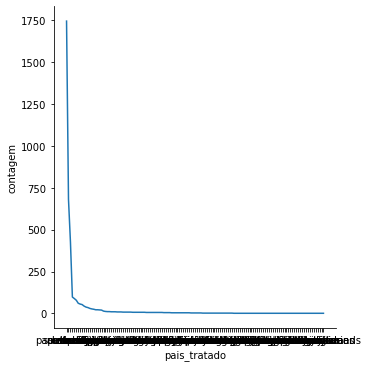

In [68]:
'''
Primeiro grafico, com todos os dados que temos
'''
#Poucos paise tem uma quantidade tem pelo menos 100 contagens
sns.relplot(data=tb_gp_graf1, x = "pais_tratado", y = 'contagem',kind="line")


In [69]:
tb_gp_graf1a.reset_index()
tb_gp_graf1a.columns

Index(['pais_tratado', 'contagem'], dtype='object')

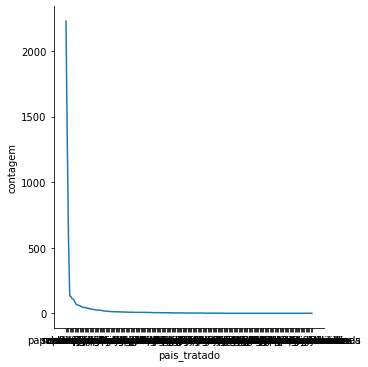

In [70]:
#Mesmo acontece no periodo de tempo de desejamos 1960 a 2017
sns.relplot(data=tb_gp_graf1a, x = "pais_tratado", y = 'contagem',kind="line")

In [71]:
tb_gp_graf1b.reset_index()
tb_gp_graf1b.columns

Index(['ano_tratado', 'contagem'], dtype='object')

In [72]:
#Quando verificamos a quantidade de registro por ano, ha uma dispersao grande, mas menos acentuada que paies
#sns.relplot(data=tb_gp_graf1b, x =str('ano_tratado'), y = 'contagem',kind="line")

In [73]:
#verificando os paises com mais registro e desde quando temos:
tb_gp_graf2

,pais_tratado,contagem,ano_min,ano_max
0,usa,1746,1960.0,2017.0
1,australia,681,1960.0,2017.0
2,southafrica,428,1960.0,2017.0
3,brazil,98,1974.0,2017.0
4,bahamas,89,1965.0,2017.0
5,newzealand,79,1960.0,2017.0
6,papuanewguinea,61,1960.0,2014.0
7,reunion,56,1972.0,2017.0
8,mexico,53,1961.0,2017.0
9,newcaledonia,44,1961.0,2016.0


In [74]:
tb_gp_graf2.columns

Index(['pais_tratado', 'contagem', 'ano_min', 'ano_max'], dtype='object')

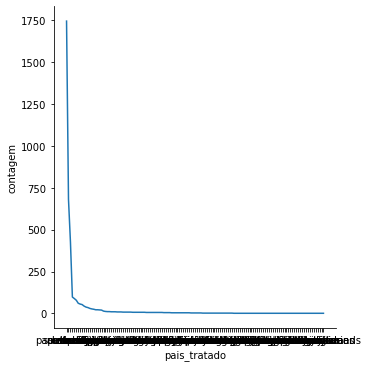

In [75]:
sns.relplot(data=tb_gp_graf2, x = "pais_tratado", y = 'contagem',kind="line")

In [76]:
tb_gp_graf3.columns

Index(['ano_tratado', 'contagem'], dtype='object')

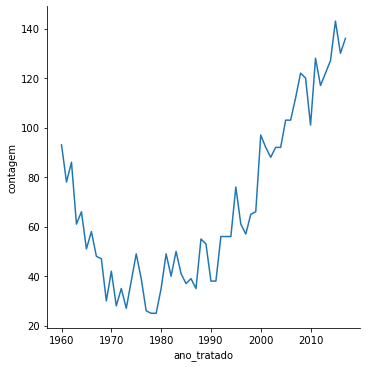

In [77]:
sns.relplot(data=tb_gp_graf3, x = "ano_tratado", y = 'contagem',kind="line")

In [78]:
#https://anderfernandez.com/blog/como-crear-animaciones-en-python/
'''
from matplotlib import animation

countries_plot = ['Spain', 'Italy', 'United States']
linechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]

# Define colors
colors = ['red', 'green', 'blue']

fig, ax = plt.subplots()

def update_linechart(i):
  for j in range(len(colors)):
    country = countries_plot[j]
    color = colors[j]

    data = linechart_plot.loc[linechart_plot['country'] == country,:]
    ax.plot(data.year[:i], data.gdpPercap[:i], color)
    
num_frames = len(linechart_plot['year'].unique())        
anim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)
anim.save('linechart.gif')

'''

"\nfrom matplotlib import animation\n\ncountries_plot = ['Spain', 'Italy', 'United States']\nlinechart_plot = gapminder.loc[gapminder['country'].isin(countries_plot), :]\n\n# Define colors\ncolors = ['red', 'green', 'blue']\n\nfig, ax = plt.subplots()\n\ndef update_linechart(i):\n  for j in range(len(colors)):\n    country = countries_plot[j]\n    color = colors[j]\n\n    data = linechart_plot.loc[linechart_plot['country'] == country,:]\n    ax.plot(data.year[:i], data.gdpPercap[:i], color)\n    \nnum_frames = len(linechart_plot['year'].unique())        \nanim = animation.FuncAnimation(fig, update_linechart, frames = num_frames)\nanim.save('linechart.gif')\n\n"

In [79]:
#https://www.analyticslane.com/2020/05/04/creacion-de-graficos-animados-con-python/
#https://ichi.pro/es/grafico-de-barras-animado-en-python-para-datos-de-series-temporales-9348495309244
#https://colab.research.google.com/github/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb#scrollTo=YT5gFEk16nG4


In [80]:
'''
bcr.bar_chart_race(
df, filename=None, orientation='h', sort='desc', n_bars=None, fixed_order=False,
fixed_max=False, steps_per_period=10, period_length=500, interpolate_period=False,
label_bars=True, bar_size=0.95, period_label=True, period_fmt=None, period_summary_func=None,
perpendicular_bar_func=None, figsize=(6, 3.5), cmap=None, title=None, title_size=None,
bar_label_size=7, tick_label_size=7, shared_fontdict=None, scale='linear', writer=None,
fig=None, dpi=144, bar_kwargs=None, filter_column_colors=False
)
'''

"\nbcr.bar_chart_race(\ndf, filename=None, orientation='h', sort='desc', n_bars=None, fixed_order=False,\nfixed_max=False, steps_per_period=10, period_length=500, interpolate_period=False,\nlabel_bars=True, bar_size=0.95, period_label=True, period_fmt=None, period_summary_func=None,\nperpendicular_bar_func=None, figsize=(6, 3.5), cmap=None, title=None, title_size=None,\nbar_label_size=7, tick_label_size=7, shared_fontdict=None, scale='linear', writer=None,\nfig=None, dpi=144, bar_kwargs=None, filter_column_colors=False\n)\n"

In [81]:
#Primeiro passo, uma tabela com os anos em cada linhas e as colunas cada pais:
tb_gp_graf4.reset_index()
tb_gp_graf4.columns

Index(['pais_tratado', 'ano_tratado', 'contagem'], dtype='object')

In [82]:
tb_gp_graf4

,pais_tratado,ano_tratado,contagem
0,usa,2015.0,73
1,usa,2014.0,66
2,usa,2007.0,66
3,usa,2017.0,65
4,usa,2016.0,64
...,...,...,...
847,japan,1998.0,1
848,japan,2004.0,1
849,japan,2008.0,1
850,japan,2016.0,1


In [83]:
tb_gp_graf4 = tb_gp_graf4.sort_values('contagem')

mask_coutry_top8 = ((tb_gp_graf4['pais_tratado'] == 'usa') |
                                 (tb_gp_graf4['pais_tratado'] == 'australia') |
                                 (tb_gp_graf4['pais_tratado'] == 'southafrica')|
                                 (tb_gp_graf4['pais_tratado'] == 'brazil') |
                                 (tb_gp_graf4['pais_tratado'] == 'newzeland')|
                                 (tb_gp_graf4['pais_tratado'] == 'papuanewguinea')|
                                 (tb_gp_graf4['pais_tratado'] == 'mexico')|
                                 (tb_gp_graf4['pais_tratado'] == 'newcaledonia'))

tb_gp_graf4b = tb_gp_graf4[mask_coutry_top8]

tb_gp_graf5 = tb_gp_graf4b.pivot(index='ano_tratado', columns='pais_tratado', values='contagem')
tb_gp_graf5

pais_tratado,australia,brazil,mexico,newcaledonia,papuanewguinea,southafrica,usa
ano_tratado,,,,,,,
1960.0,21.0,NaN,NaN,NaN,10.0,9.0,25.0
1961.0,24.0,NaN,1.0,1.0,2.0,10.0,17.0
1962.0,20.0,NaN,2.0,NaN,6.0,11.0,21.0
1963.0,11.0,NaN,NaN,NaN,4.0,11.0,11.0
1964.0,9.0,NaN,1.0,1.0,8.0,10.0,14.0
1965.0,5.0,NaN,6.0,NaN,4.0,4.0,14.0
1966.0,17.0,NaN,NaN,NaN,4.0,4.0,16.0
1967.0,10.0,NaN,2.0,NaN,5.0,5.0,9.0
1968.0,8.0,NaN,1.0,NaN,4.0,5.0,15.0


In [84]:
#!conda install -c conda-forge bar_chart_race
#!conda install -c conda-forge ffmpeg

In [85]:
!pip install ffmpeg-python

In [86]:
tb_gp_graf5

pais_tratado,australia,brazil,mexico,newcaledonia,papuanewguinea,southafrica,usa
ano_tratado,,,,,,,
1960.0,21.0,NaN,NaN,NaN,10.0,9.0,25.0
1961.0,24.0,NaN,1.0,1.0,2.0,10.0,17.0
1962.0,20.0,NaN,2.0,NaN,6.0,11.0,21.0
1963.0,11.0,NaN,NaN,NaN,4.0,11.0,11.0
1964.0,9.0,NaN,1.0,1.0,8.0,10.0,14.0
1965.0,5.0,NaN,6.0,NaN,4.0,4.0,14.0
1966.0,17.0,NaN,NaN,NaN,4.0,4.0,16.0
1967.0,10.0,NaN,2.0,NaN,5.0,5.0,9.0
1968.0,8.0,NaN,1.0,NaN,4.0,5.0,15.0


In [90]:
'''
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
'''
import bar_chart_race as bcr

bcr.bar_chart_race(tb_gp_graf5, filename='/SharkAttack.mp4', orientation='h', sort='desc', n_bars=5, fixed_order=False,
                fixed_max=True, steps_per_period=25, period_length=1000, interpolate_period=False,
                label_bars=True, bar_size=1, period_label=True, period_fmt=None, period_summary_func=None,
                perpendicular_bar_func=None, figsize=(5, 3), cmap=None, title=None, title_size=None,
                bar_label_size=12, tick_label_size=12, shared_fontdict=None, scale='linear', writer=None,
                fig=None, dpi=100, bar_kwargs=None, filter_column_colors=False
                )
